<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/15_Regressione_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi di regressione: underfitting

Questo notebook mostra che, in caso di underfitting, i residui (errori) del modello di regressione LSE mostrano un chiaro pattern (cioè, un errore sistematico) che rappresenta la porzione della variabile target che non viene catturata dal modello di regressione.

Per semplicità di rappresentazione grafica si utilizzerà una sola variabile esplicativa $x$.

Innanzitutto, generiamo casualmente dei valori di $x$ compresi in un certo intervallo e, successivamente, generiamo dei valori di un parametro $\epsilon$ utilizzati per perturbare il valore di $y$ rispetto al caso ideale (ad esempio, punti tutti giacenti su una retta, nel caso lineare).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parametri usati per generare i dati

# Limite inferiore e superiore entro cui generare le x
x_min = 0
x_max = 100

# numero di valori da generare
size = 50

# deviazione standard per la distribuzione secondo cui generare epsilon
std = 300

# seme del generatore casuale (per la riproducibilità degli esperimenti)
np.random.seed(123456789)

# generiamo 50 osservazioni per la x tra x_min e x_max
x = np.random.randint(low=x_min, high=x_max, size=size)

# generiamo 50 osservazioni per epsilon secondo una distribuzione normale
# con media=0 e sigma=300
eps = np.random.normal(loc=0, scale=std, size=size)
print(x)
print(eps)

[56 28 50 89 90 29  7 79 83 60 84 96 99 78 82 95 85 51 88 15  7 74 53 78
 74 25 32 85 35 46 16 80 83 40 47 67 46  9 16  6 12 61  9 50 50 90 24 24
 71 66]
[  97.03016006  -47.29638689  676.9285993   419.07096747  -19.29321586
 -206.08833605  493.55726054 -349.80782168   49.99234464  220.07427361
 -593.92845688  -68.27058193   45.23569865 -387.61476482  143.57774171
  208.55660638  -79.31667382  -68.74949138  213.65165989  207.10702979
 -243.68955231 -257.99306718  473.14618511 -133.89179081   24.09072284
 -566.43476295 -215.30105668  149.25985411 -152.34664652  -23.56285793
  393.51936579 -516.51351224  185.36604837 -230.31883711   51.44633342
 -641.36428872 -310.8458686  -275.74551303  -48.81157171   49.0631563
  471.40029943  144.94473015  605.71144186 -310.00804373   50.45764947
  271.22809053 -491.9161139  -536.49056521   67.26013154   75.87004215]


## Dati lineari e regressione lineare

Verifichiamo che un modello lineare si adatta bene a dei dati che sono distribuiti approssimativamente lungo una retta. In questo caso specifico, la retta ideale sarebbe $y=50 + 8x$. Per introdurre un po' di variabilità nei dati, i valori di $y$ sono generati come $y = 50 + 8x + \epsilon$.

In [ ]:
# Generazione di dati secondo un trend lineare
y = 50 + 8 * x + eps
print(y)

[ 595.03016006  226.70361311 1126.9285993  1181.07096747  750.70678414
   75.91166395  599.55726054  332.19217832  763.99234464  750.07427361
  128.07154312  749.72941807  887.23569865  286.38523518  849.57774171
 1018.55660638  650.68332618  389.25050862  967.65165989  377.10702979
 -137.68955231  384.00693282  947.14618511  540.10820919  666.09072284
 -316.43476295   90.69894332  879.25985411  177.65335348  394.43714207
  571.51936579  173.48648776  899.36604837  139.68116289  477.44633342
  -55.36428872  107.1541314  -153.74551303  129.18842829  147.0631563
  617.40029943  682.94473015  727.71144186  139.99195627  500.45764947
 1041.22809053 -249.9161139  -294.49056521  685.26013154  653.87004215]


Determiniamo i valori dei parametri $\mathbf{w}$ per il modello lineare $y = w_0 + w_1 x$, utilizzando il metodo dei minimi quadrati. L'obiettivo è verificare che il modella spiega bene i dati e che il vettore dei residui (errori) ha una media pari approssimativamente a 0 e non mostra un trend ben definito.

In [ ]:
# creiamo un vettore di tutti 1, di dmensione pari a quella di x
ones = np.ones(len(x))

# costruiamo la matrice A con 2 colonne (1 e x) e 'size' righe e ne facciamo la trasposta
A = np.vstack([ones, x]).T

# calcoliamo i coefficienti dei minimi quadrati
w = np.linalg.lstsq(A, y)[0]

# generiamo i punti (1000 equispaziati tra x_min e x_max) per il grafico della retta di regressione
x_1 = np.linspace(x_min, x_max, 1000)

# calcoliamo i punti sulla retta di regressione
y_1 = w[0] + w[1] * x_1

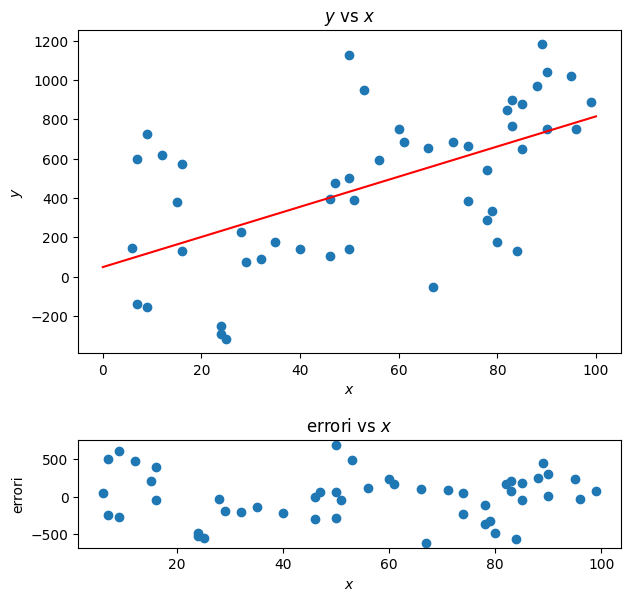

In [ ]:
'''
fig, ax = plt.subplots(...) crea una figura (fig) con una griglia di assi (ax).
nrows=2 e ncols=1 creano due subplot in una colonna (una sotto l'altra).
figsize=(7, 7) imposta le dimensioni della figura a 7x7 pollici.
gridspec_kw permette di specificare:
'width_ratios': [3] - La larghezza della singola colonna è 3 volte quella di default.
'height_ratios': [3, 1] - La prima riga (grafico principale) è 3 volte più alta della seconda riga (grafico degli errori).
'hspace': 0.4 - Spazio verticale tra le righe.
'''
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),
      gridspec_kw={'width_ratios': [3], 'height_ratios': [3, 1], 'hspace': 0.4})

ax[0].scatter(x,y)
ax[0].plot(x_1, y_1, color='r')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("$y$ vs $x$")

errori = y - (w[0] + w[1] * x)
ax[1].scatter(x, errori)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("errori")
ax[1].set_title("errori vs $x$")

# Regolazione degli spazi tra i subplot:
# plt.subplots_adjust() modifica i margini e le spaziature:
# top=0.85: Riduce lo spazio tra i subplot e il margine superiore
plt.subplots_adjust(top=0.85)

## Dati quadratici e regressione lineare

Verifichiamo ora che, se i dati seguono un andamento tendenzialmente quadratico, un modello lineare non li spiega bene e gli errori commessi dal modello seguono un pattern evidente.

In [ ]:
# Generazione di dati secondo un trend quadratico
y = 50 + 8 * x + 2 * x**2 + eps

In [ ]:
#ones = np.ones(len(x))
A = np.vstack([ones, x]).T
w = np.linalg.lstsq(A, y)[0]
x_1 = np.linspace(x_min, x_max, 1000)
y_1 = w[0] + w[1] * x_1

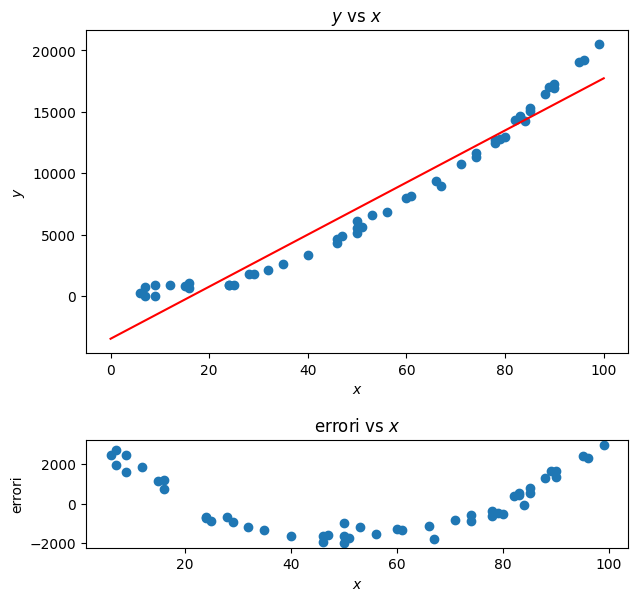

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),
      gridspec_kw={'width_ratios': [3], 'height_ratios': [3, 1], 'hspace': 0.4})

ax[0].scatter(x,y)
ax[0].plot(x_1, y_1, color='r')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("$y$ vs $x$")

errori = y - (w[0] + w[1] * x)
ax[1].scatter(x, errori)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("errori")
ax[1].set_title("errori vs $x$")

plt.subplots_adjust(top=0.85)

## Dati quadratici e regressione quadratica

Verifichiamo ora che, se i dati seguono un andamento tendenzialmente quadratico, un modello quadratico li spiega bene e gli errori commessi dal modello non seguono un pattern evidente.

In [ ]:
A = np.vstack([ones, x, x**2]).T
w = np.linalg.lstsq(A, y)[0]
x_1 = np.linspace(x_min, x_max, 1000)
y_1 = w[0] + w[1] * x_1 + w[2] * x_1**2

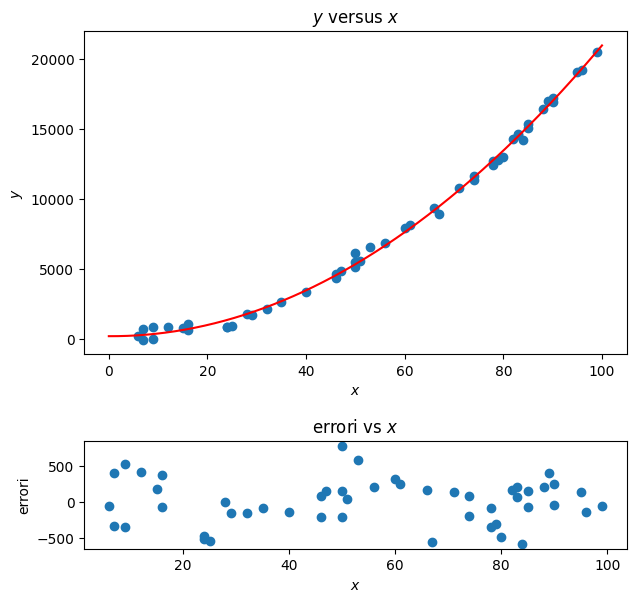

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),
      gridspec_kw={'width_ratios': [3], 'height_ratios': [3, 1], 'hspace': 0.4})

ax[0].scatter(x,y)
ax[0].plot(x_1, y_1, color='r')
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("$y$ versus $x$")

errori = y - (w[0] + w[1] * x + w[2] * x**2)
ax[1].scatter(x, errori)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("errori")
ax[1].set_title("errori vs $x$")

plt.subplots_adjust(top=0.85)